train model, test split, model select and applicaion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd  #read tables
import numpy as np  #math computaional
import matplotlib.pyplot as plt #show plot
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML FOR Geoscience/Vshale/F03-4_df_Vsh-out.csv')
df.head()

,Unnamed: 0,Time,Vsh,Energy,sem_cross,Amp_1,Ins_Freq,ins_hilbert
0,10583,500.001617,0.133900,4144877.50,0.994209,-239280.5313,41.474419,-2438.240967
1,10585,500.100617,0.144500,4120573.50,0.994226,-243213.4375,41.111633,-2478.752441
2,10587,500.199615,0.149065,4103427.00,0.994205,-248028.6875,40.628738,-2497.153076
3,10588,500.249145,0.143400,4094815.25,0.994194,-250397.2656,40.381859,-2505.461426
4,10590,500.348144,0.133700,4077536.75,0.994171,-255036.1719,39.876820,-2520.072510


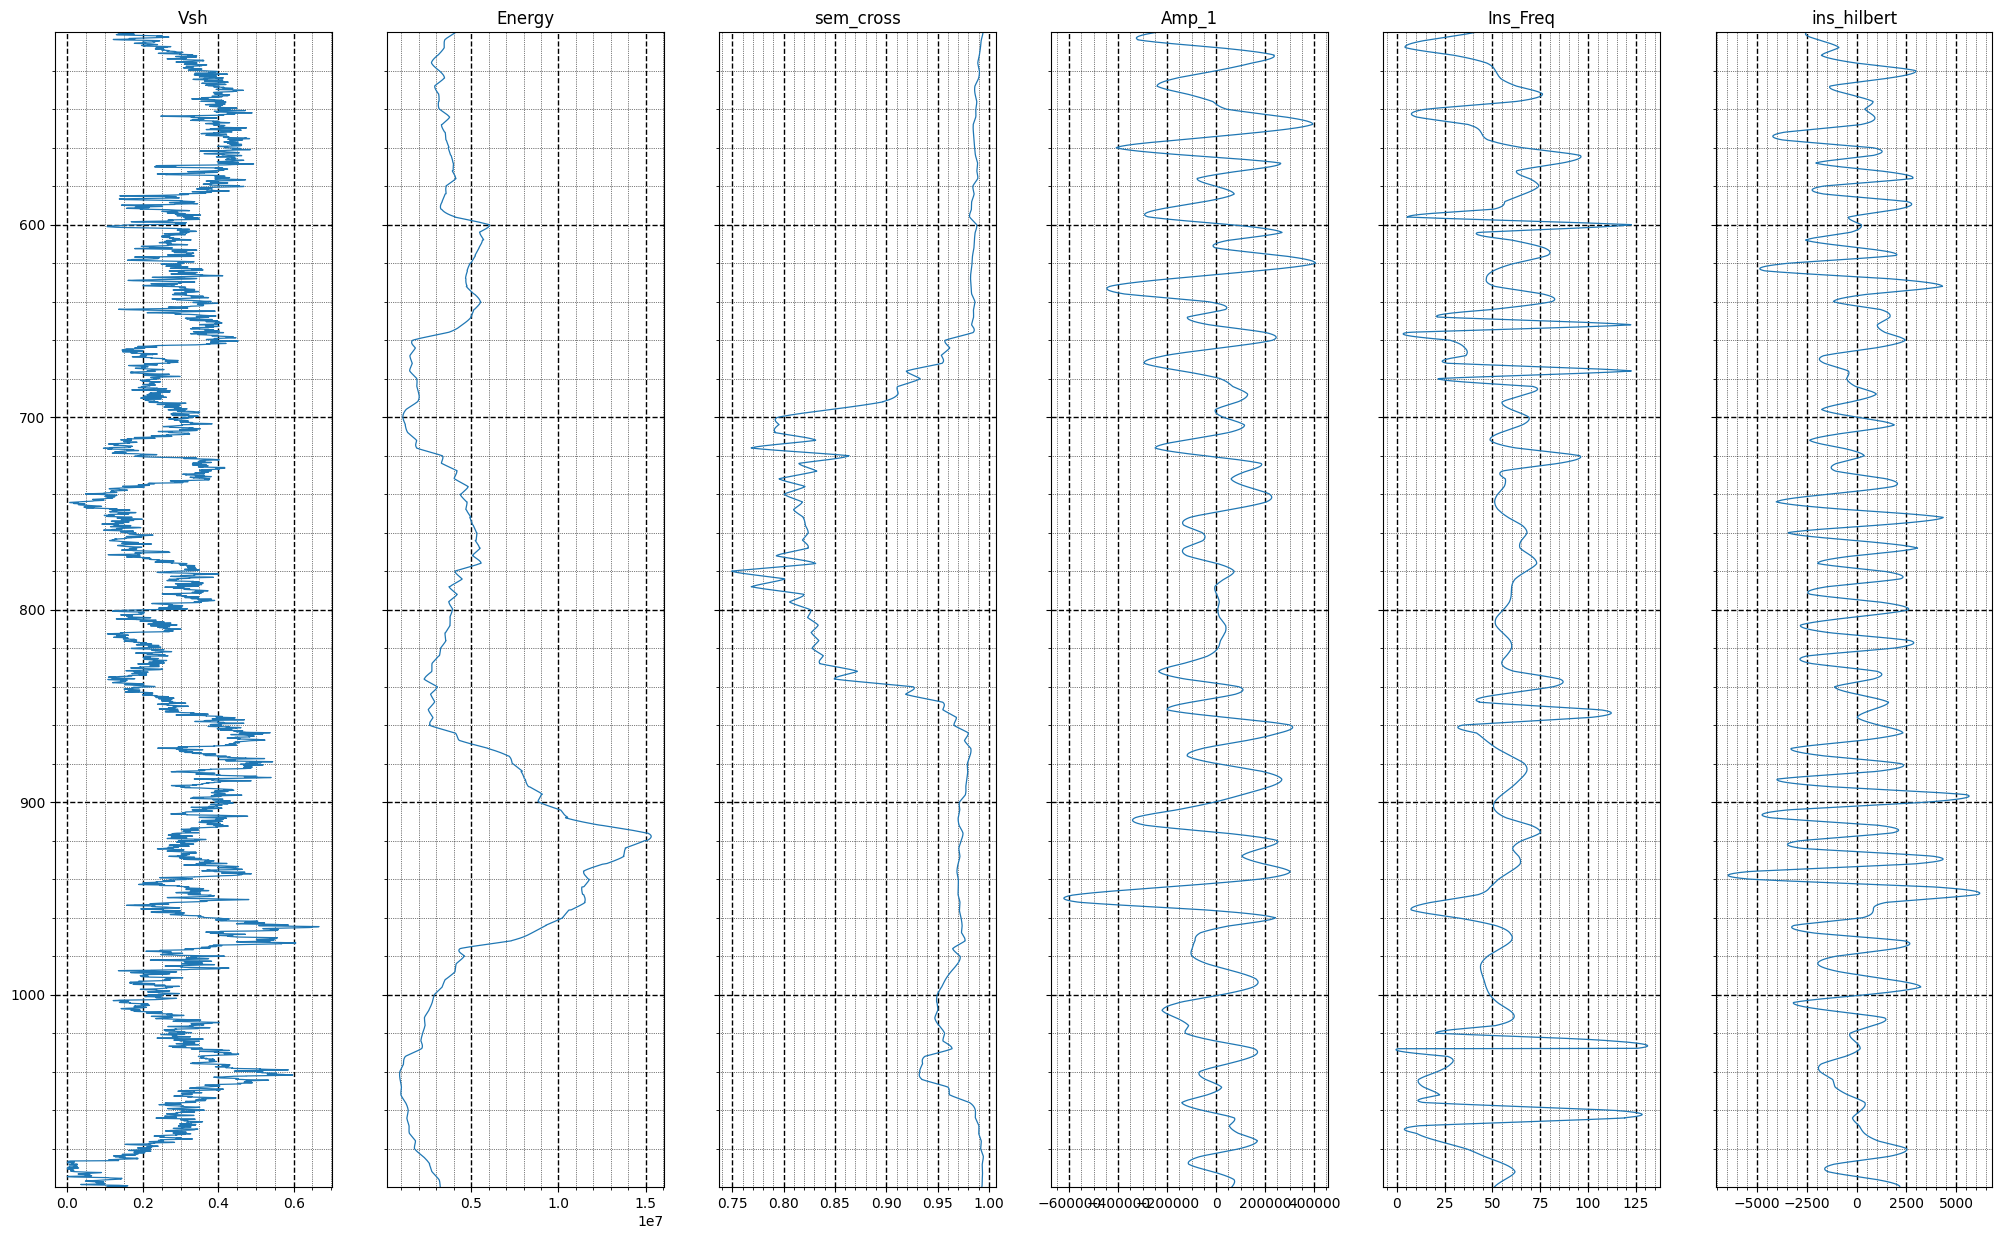

In [ ]:
# Remove Unnamed Column
if 'Unnamed: 0' in df.columns:
   df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()
#plot the logs after remove the unnamed column
rows, cols = 1,len(df.columns)-1
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25,15), sharey=True)
names = [ 'Time', 'Vsh', 'Energy', 'sem_cross', 'Amp_1', 'Ins_Freq', 'ins_hilbert']
for i in range(cols):
    ax[i].plot(df.iloc[:,i+1], df.iloc[:,0],linewidth='0.9')
    ax[i].set_ylim(max(df.iloc[:, 0]), min(df.iloc[:, 0]))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax[i].set_title('%s' %names[i+1])

In [ ]:
# Prediction libraries
from sklearn import preprocessing   #sikit lean; prepare data before feeding it into ML model. sci kit learn contain most algorithm need in ML
from sklearn.preprocessing import StandardScaler   #let all logs have a same scale, StanderdScaler is used to standardize features by removing the mean and scaling to unit variance. ML algorithm sense to feature scale.
from sklearn.model_selection import train_test_split   #split data into training and testing sets
from sklearn.metrics import r2_score  #calculate R-square= regression score; measure of how well a regression model fits the observed data.
from sklearn.metrics import mean_squared_error #calculate mean squared error between any predicted log and porosity log; lower MSE= better model performance
from sklearn.linear_model import LinearRegression  #linear regression algorithm simple for predicting a continuous target variable based on one or more predictor variables, finds the best-fitting straight line.
from sklearn.ensemble import RandomForestRegressor #supervised ML use for predection task, more accurate in predicit than linearregression.
from sklearn.tree import plot_tree, export_text #plot tree=visulize decision tree(type of supervised learn algorithm for classification + regression) export text=represent the decision tree as text than plot
from sklearn.neural_network import MLPRegressor  #NN=multi layer precetron MLP= create NN model that predict numerical value(predict porosity based on other well log measure)
from sklearn.datasets import make_regression    #help for test ML algorithm for regression task.

we chosse to use those three type of prediction (linear regression, random forest and NN) at last want to compare and know which one is best result with Vshale log.
used from in first because if upload all sklearn it will fill the RAM **bold text**

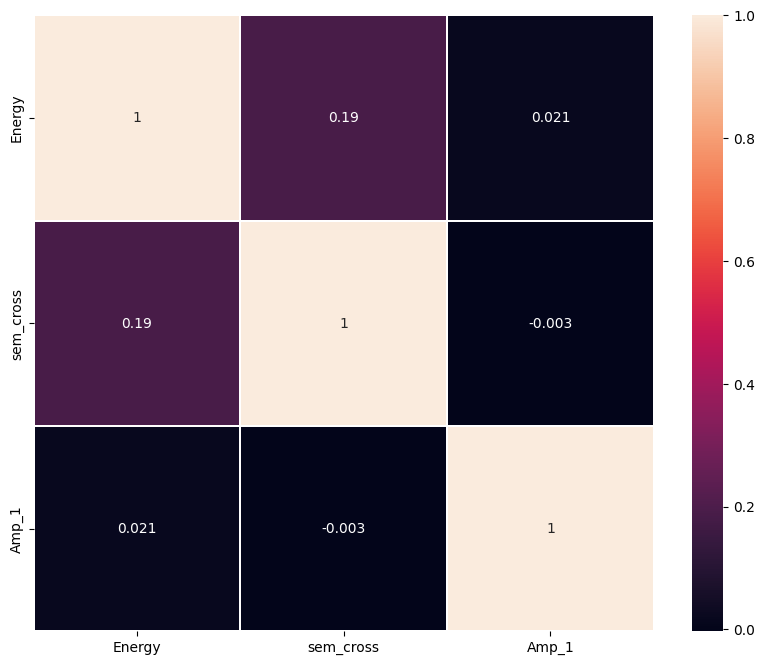

In [ ]:
# Input the selected data and plot the correlation
Xdata = df[['Energy', 'sem_cross', 'Amp_1']]  #from the above df select those column as X-axis
ydata = df['Vsh']

# Plotting the Correlation Matrix between X element to show the diversity <90%
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(Xdata.corr(),annot=True,ax=ax,linewidths=0.1);    #plot use seaborn lib because matpltlib canot plot heat map

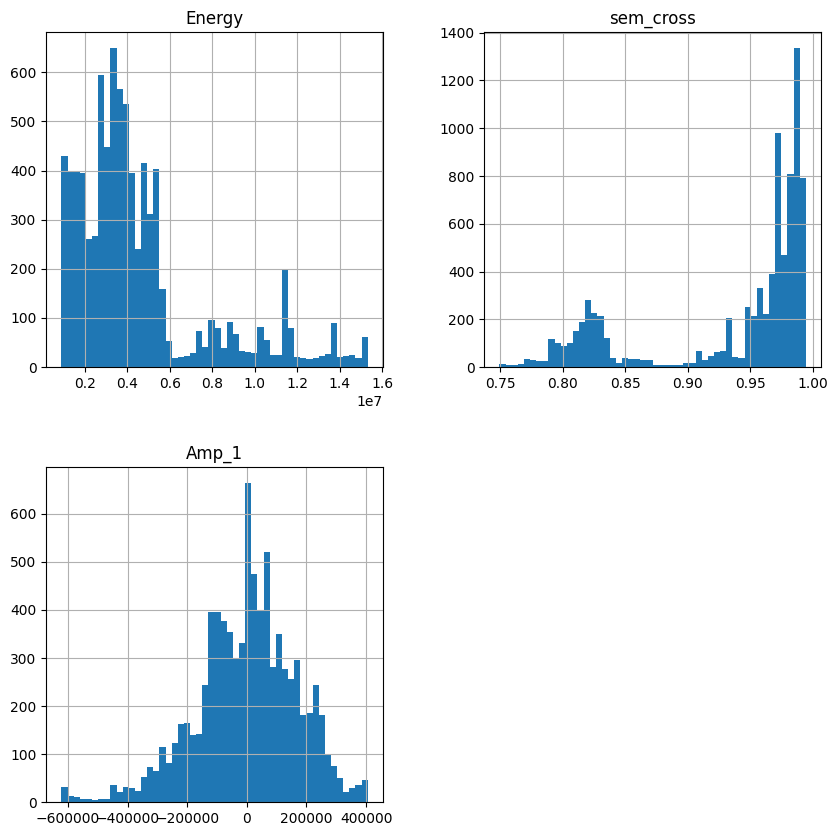

In [ ]:
# Histogram correlated features for X axis to know the scale
Xdata.hist(bins=50, figsize=(10,10))
plt.show()

because the differ in scale for above data; standerize the scale for all

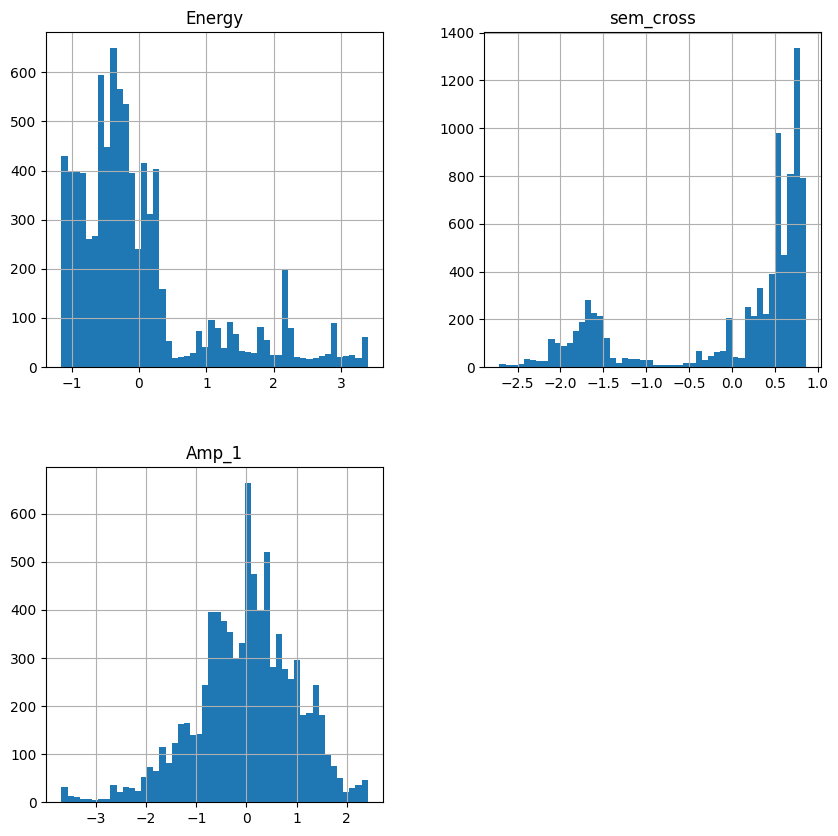

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()   #all logs mean must=0 and variance =1
# Fit the scaler on the data and transform it
Xdata_S = scaler.fit_transform(Xdata)

# Convert the result back to a DataFrame (optional) rename the data as x data new=after stander scale.
Xdata_new = pd.DataFrame(Xdata_S, columns=Xdata.columns)

# Show the standardized data
Xdata_new.hist(bins=50, figsize=(10,10))
plt.show()

start to do the ML, all the previous are called DATA ENGINEERING its prepare data before ML.
as we finished: data loading>>wrangling>>scaling>>correlation matrix

In [ ]:
#@title Train Test Split
X_train, X_test, y_train, y_test = train_test_split(Xdata_new, ydata, test_size=0.2, random_state=42) # this code divide data into two groups one for training; second for test,
                                                                                                      #selected as test size=0.2= Allocates 20% of the data to the testing set, and the remaining 80% to the training set.
                                                                                                      #x_test=20% of xdata_new, and x_training = 80% of xdata_new

In [ ]:
#@title Model Selection: 1. Linear Regression
# Apply Linear Regression Model to the features
linear_reg = LinearRegression() #use this algorithm to apply on data
linear_reg.fit(X_train,y_train)   #select data want to apply X,Y; define fit line
# Estimate Predictions
pred_L_reg_train=linear_reg.predict(X_train)  #estimate x
pred_L_reg_test=linear_reg.predict(X_test)   #estimate x
pred_L_reg = linear_reg.predict(Xdata_new)   #apply for all x data(train+test)
# Print the RMS Error and Score
print('RMSE for training data = ', round(mean_squared_error(y_train,pred_L_reg_train), 4))  #error in training
print('R2 Score for training data = ', round(r2_score(y_train, pred_L_reg_train), 2)) #correlation of train data
print('RMSE for testing data = ', round(mean_squared_error(y_test,pred_L_reg_test), 4))   #error in test
print('R2 Score for testing data = ', round(r2_score(y_test, pred_L_reg_test), 2))   #correlation of test data

RMSE for training data =  0.0094
R2 Score for training data =  0.17
RMSE for testing data =  0.0101
R2 Score for testing data =  0.12


the square R is low because this is linear regression deal, the well log data is non-leanerity data

In [ ]:
#@title 2. Random Forest
# Apply Random Forest Model to the features, this algorithm is good when calculate property prediction
RFR = RandomForestRegressor(random_state=42, max_depth=10 ,).fit(X_train, y_train) #just this code is all;42 tree, 10 layer deep in tree(if increse may over fit for predict)
# Estimate Predictions
pred_RFR_train= RFR.predict(X_train)
pred_RFR_test=RFR.predict(X_test)
pred_RFR = RFR.predict(Xdata_new)
# Print the RMS Error and Score
# Print the RMS Error and Score
print('RMSE for training data = ', round(mean_squared_error(y_train,pred_RFR_train), 4))
print('R2 Score for training data = ', round(r2_score(y_train, pred_RFR_train), 2))
print('RMSE for testing data = ', round(mean_squared_error(y_test,pred_RFR_test), 4))
print('R2 Score for testing data = ', round(r2_score(y_test, pred_RFR_test), 2))

RMSE for training data =  0.0008
R2 Score for training data =  0.93
RMSE for testing data =  0.001
R2 Score for testing data =  0.91


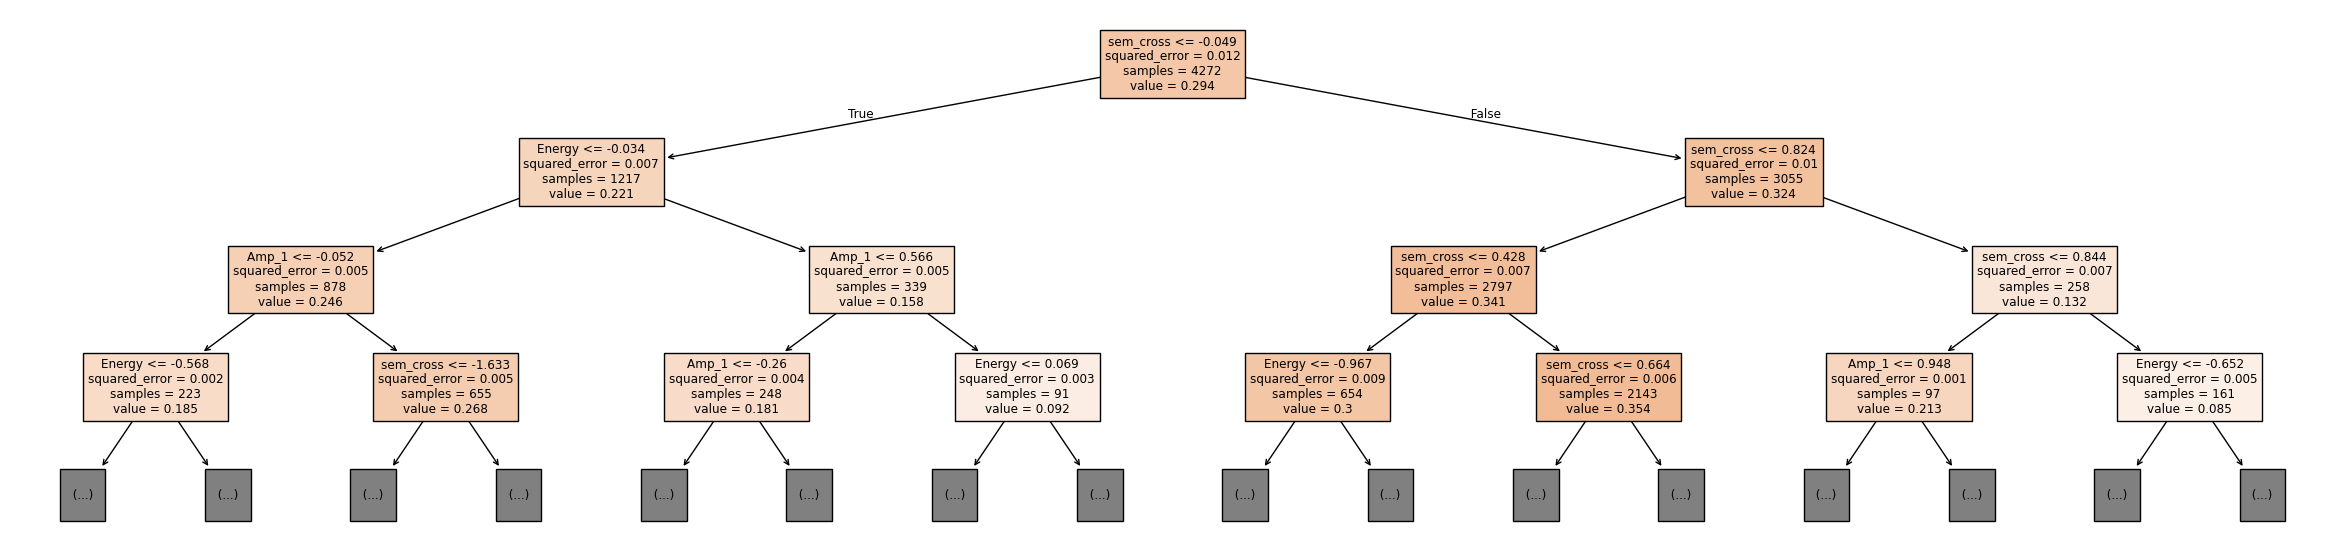

In [ ]:
# Visualize the Forest
plt.figure(figsize=(30,7))
plot_tree(RFR.estimators_[20], max_depth=3, feature_names=X_train.columns, filled=True, rounded=False);

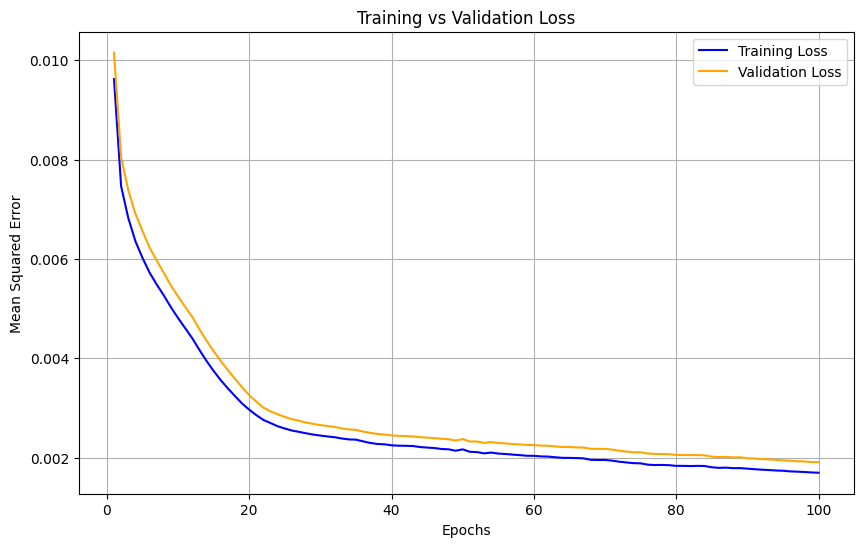

In [ ]:
#@title 3. Nerual Network
# Step 1: Define the NN model, most powerful algorithm in prediction, MLP=multi layer preceptron; type of NN use in supervised learing to predict contimous values(regression).
model_NN = MLPRegressor(hidden_layer_sizes=(50, 50, 50),      # three hidden layers with 50 neurons in each layer
                     activation='relu',                       # Activation function is to determine how output of each neurons is calculated; relu=Rectified Linear Unit, common
                     solver='adam',                           # Optimizer to minimize error duting training.adam= Adaptive Moment Estimation.
                     max_iter=100,                            # Number of epochs, not mean it will use it all! it stop when reach minimum error
                     random_state=42)                         #seed

# Step 2: Train the model and track training and validation loss
train_loss = []
val_loss = []

for epoch in range(model_NN.max_iter):
    model_NN.partial_fit(X_train, y_train)  # Fit one epoch
    train_loss.append(mean_squared_error(y_train, model_NN.predict(X_train)))    # Training loss
    val_loss.append(mean_squared_error(y_test, model_NN.predict(X_test)))        # Validation loss

# Step 3: Plot training and validation loss, it tell us the try numbers of f NN to acheive minimum error.
plt.figure(figsize=(10, 6))
plt.plot(range(1, model_NN.max_iter + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, model_NN.max_iter + 1), val_loss, label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Estimate Predictions
pred_model_NN_train= model_NN.predict(X_train)
pred_model_NN_test=model_NN.predict(X_test)
pred_model_NN = model_NN.predict(Xdata_new)
# Print the RMS Error and Score
print('RMSE for training data = ', round(mean_squared_error(y_train,pred_model_NN_train), 4))
print('R2 Score for training data = ', round(r2_score(y_train, pred_model_NN_train), 2))
print('RMSE for testing data = ', round(mean_squared_error(y_test,pred_model_NN_test), 4))
print('R2 Score for testing data = ', round(r2_score(y_test, pred_model_NN_test), 2))

RMSE for training data =  0.0017
R2 Score for training data =  0.85
RMSE for testing data =  0.0019
R2 Score for testing data =  0.83


Compare Orignal Vsh values with Predict values from LR, RF& NN

In [ ]:
# Add the prediction columns to the df with real porosity log for compare
df['pred_L_reg'] = pred_L_reg
df['pred_RFR'] = pred_RFR
df['pred_NN'] = pred_model_NN
# the prediction DataFrame
prediction_df = df[['Time','Vsh', 'pred_L_reg', 'pred_RFR', 'pred_NN']]
prediction_df

,Time,Vsh,pred_L_reg,pred_RFR,pred_NN
0,500.001617,0.133900,0.311569,0.137920,0.128508
1,500.100617,0.144500,0.311208,0.142212,0.132589
2,500.199615,0.149065,0.310800,0.144405,0.138458
3,500.249145,0.143400,0.310597,0.143126,0.141389
4,500.348144,0.133700,0.310199,0.140227,0.147228
...,...,...,...,...,...
8404,1099.610352,0.106200,0.327306,0.120855,0.093665
8405,1099.709229,0.104675,0.327261,0.120143,0.095323
8406,1099.758911,0.112290,0.327239,0.121770,0.096183
8407,1099.857788,0.136300,0.327194,0.131813,0.097950


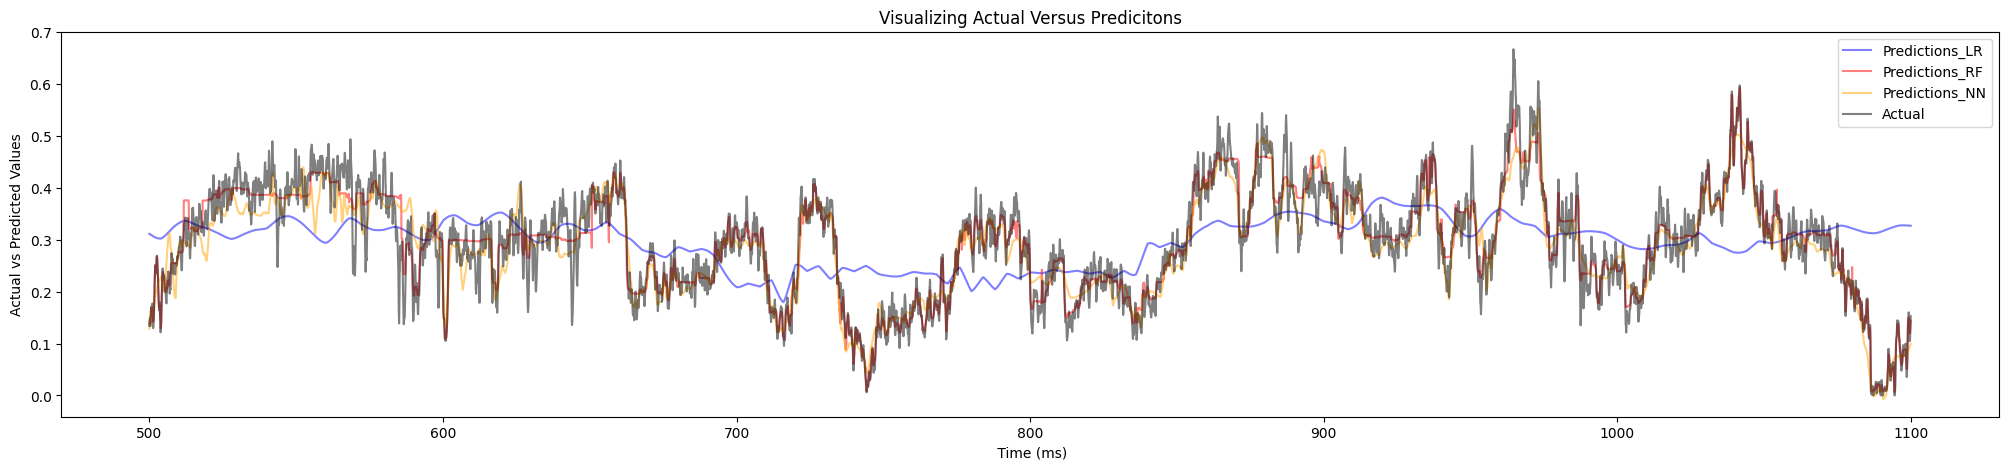

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(prediction_df['Time'], prediction_df['pred_L_reg'], c = 'blue', alpha=0.5, label = 'Predictions_LR' )
plt.plot(prediction_df['Time'], prediction_df['pred_RFR'], c = 'red', alpha=0.5, label = 'Predictions_RF' )
plt.plot(prediction_df['Time'], prediction_df['pred_NN'], c = 'orange', alpha=0.5, label = 'Predictions_NN' )
plt.plot(prediction_df['Time'], prediction_df['Vsh'], c = 'black' , alpha=0.5, label = 'Actual')
plt.xlabel(" Time (ms)")
plt.ylabel("Actual vs Predicted Values")
plt.title("Visualizing Actual Versus Predicitons")
plt.legend()
plt.show()

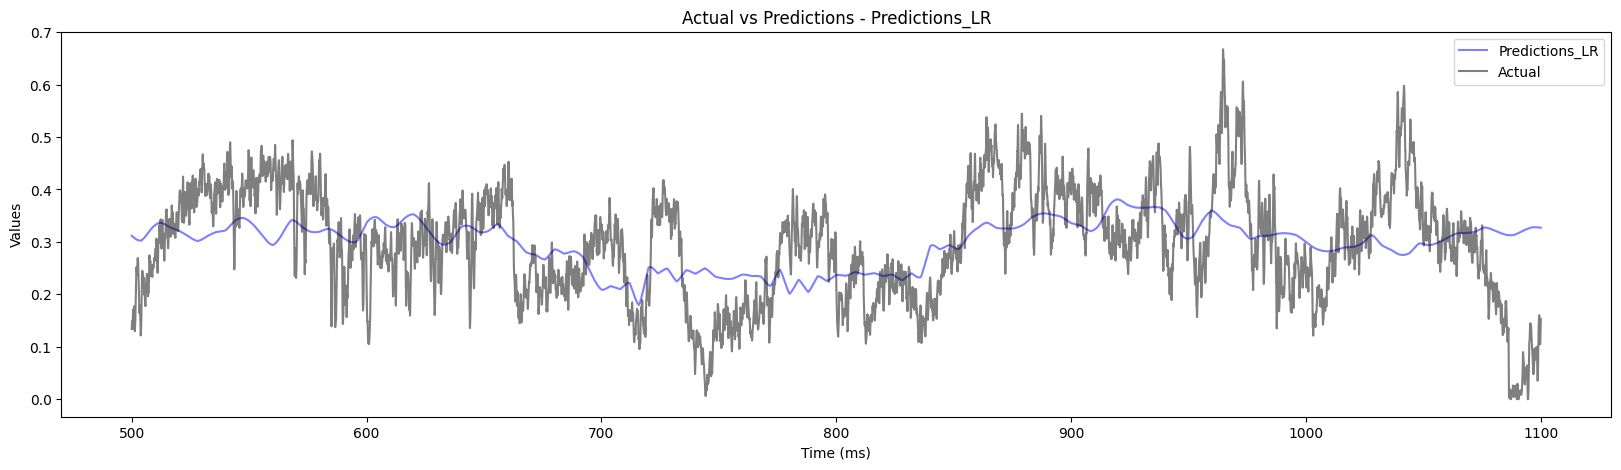

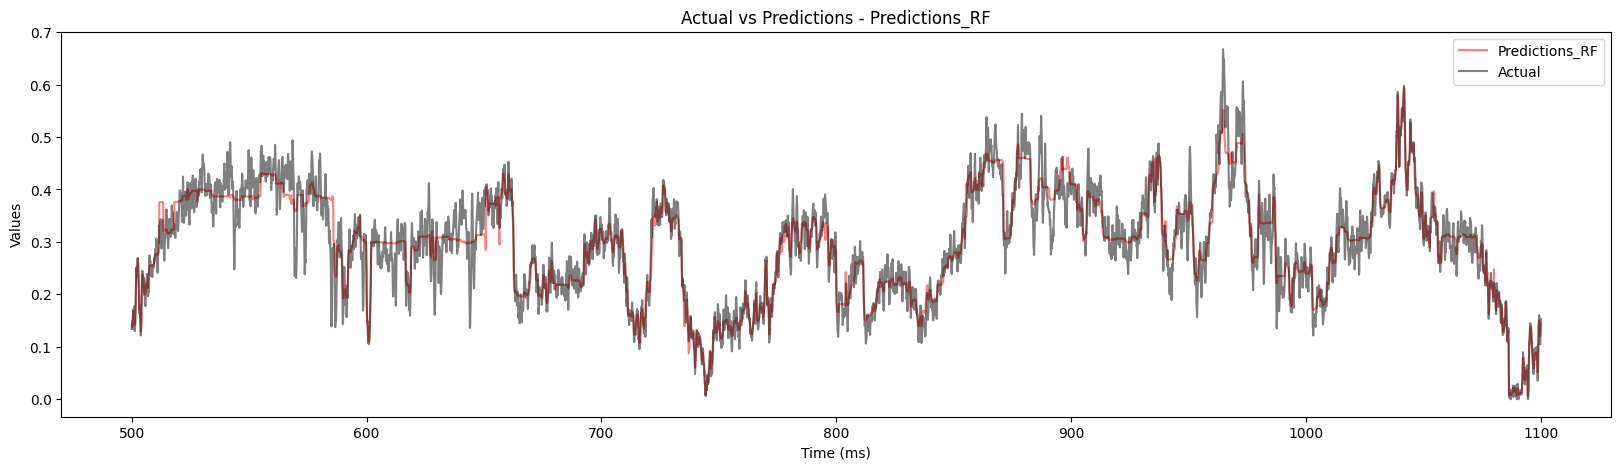

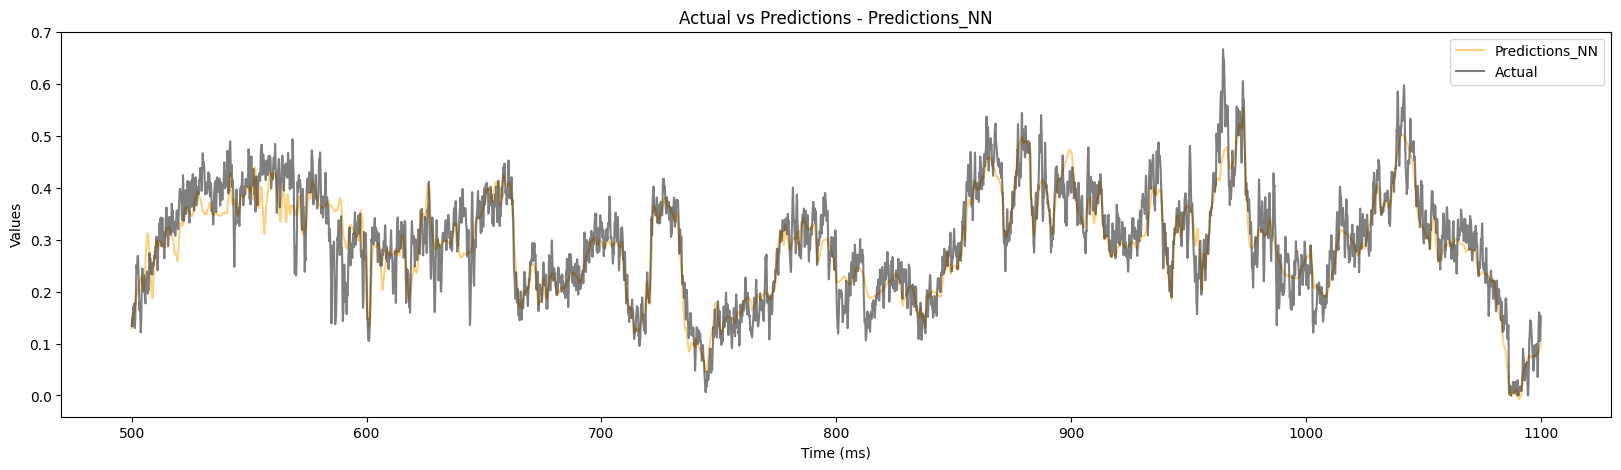

In [ ]:
models = [
    ('pred_L_reg', 'blue', 'Predictions_LR'),
    ('pred_RFR', 'red', 'Predictions_RF'),
    ('pred_NN', 'orange', 'Predictions_NN'),
]

# Actual values
actual = prediction_df['Vsh']
depth = prediction_df['Time']

# Create separate plots for each model
for model, color, label in models:
    plt.figure(figsize=(20, 5))
    plt.plot(depth, prediction_df[model], c=color, alpha=0.5, label=label)
    plt.plot(depth, actual, c='black', alpha=0.5, label='Actual')

    # Labels and title
    plt.xlabel("Time (ms)")
    plt.ylabel("Values")
    plt.title(f"Actual vs Predictions - {label}")
    plt.legend()

    # Show the p

In [ ]:
#@title Save the Trained Models
import joblib
# Save the models to a file
joblib.dump(linear_reg, '/content/drive/MyDrive/Colab Notebooks/ML FOR Geoscience/Vshale/linear_regression_model_edit.pkl')
joblib.dump(RFR, '/content/drive/MyDrive/Colab Notebooks/ML FOR Geoscience/Vshale/random_forest_model_edit.pkl')
joblib.dump(model_NN, '/content/drive/MyDrive/Colab Notebooks/ML FOR Geoscience/Vshale/neural_network_model_edit.pkl')
print("Models saved successfully!")

Models saved successfully!
